In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, gzip
import ternary

In [2]:
input_path='/fastscratch/c-panz/megalodon'
output_path='/pod/2/li-lab/Ziwei/Nanopore/daily/2021-09-03'

In [5]:
df = pd.read_csv(os.path.join(input_path,'T4.Megalodon.per_read.prob.bed'), sep='\t')
df

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob
0,KJ477685.1,203,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.452924,0.082417,0.464659
1,KJ477685.1,260,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.335953,0.503312,0.160735
2,KJ477685.1,260,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.577034,0.057676,0.365290
3,KJ477685.1,265,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.063766,0.864525,0.071710
4,KJ477685.1,265,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.794235,0.028885,0.176880
...,...,...,...,...,...,...,...
2076,KJ477685.1,164765,570869d4-bfd7-4d9a-9dab-23c5a5bd9e47,-,0.033854,0.029737,0.936408
2077,KJ477685.1,164789,05eb1b57-0c8d-4aa7-a5d9-55d6d6e2a1dc,-,0.063935,0.909510,0.026555
2078,KJ477685.1,164789,15dee92a-3e70-4006-a39b-59dc75c9f169,-,0.067223,0.171466,0.761311
2079,KJ477685.1,164789,436ab228-8780-4633-bace-dec5903849c4,-,0.144235,0.709570,0.146195


# fully 5hmC/5mC/5C
## Per_read probability (histgram)

In [23]:
#Draw the 5hmC_prob distribution
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
def hydroxymethyl_prob_histgram(input_path, input_file, prefix, output_path):
    #Plot points(marker pattern, size)
    df = pd.read_csv(os.path.join(input_path, input_file), sep='\t')
    x=df['5hmC_prob']*100
    binwidth=5
    kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
                  edgecolor='black', align='mid')
    plt.figure(figsize=(6,4), dpi=90)
    plt.gca().set(title='{} Histogram of 5hmC probability by Megalodon'.format(prefix),
                  xlabel='5hmC_prob per base', ylabel='Probability')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    n, bins, _ = plt.hist(x=x, **kwargs)
    
    k = [round(i/len(x)*100, 1) for i in n]
    for i in range(0, len(n)):
        x_pos = bins[i] - 0.5
        y_pos = n[i] 
        label = str(k[i]) # relative frequency of each bin
        plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
    fig_name = '{}.Megalodon.per_read.5hmC_probability'.format(prefix) + '.png'   
    plt.savefig(fname=os.path.join(output_path, fig_name), 
                dpi=100, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)

    plt.show()
    
def methyl_prob_histgram(input_path, input_file, prefix, output_path):
    #Plot points(marker pattern, size)
    df = pd.read_csv(os.path.join(input_path, input_file), sep='\t')
    x=df['5mC_prob']*100
    binwidth=5
    kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
                  edgecolor='black', align='mid')
    plt.figure(figsize=(6,4), dpi=90)
    plt.gca().set(title='{} Histogram of 5mC probability by Megalodon'.format(prefix),
                  xlabel='5mC_prob per base', ylabel='Probability')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    n, bins, _ = plt.hist(x=x, **kwargs)
    
    k = [round(i/len(x)*100, 1) for i in n]
    for i in range(0, len(n)):
        x_pos = bins[i] - 0.5
        y_pos = n[i] 
        label = str(k[i]) # relative frequency of each bin
        plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
    fig_name = '{}.Megalodon.per_read.5mC_probability'.format(prefix) + '.png'   
    plt.savefig(fname=os.path.join(output_path, fig_name), 
                dpi=100, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)

    plt.show()

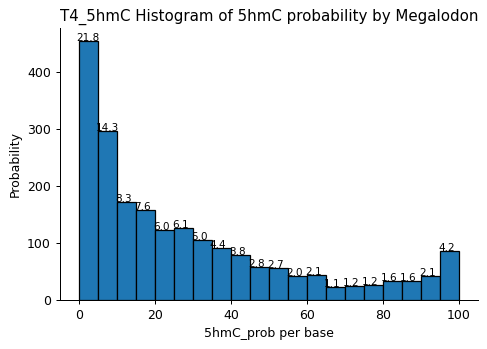

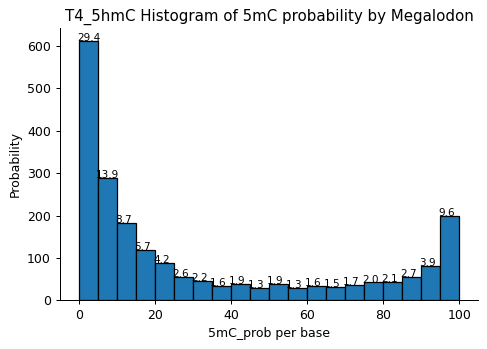

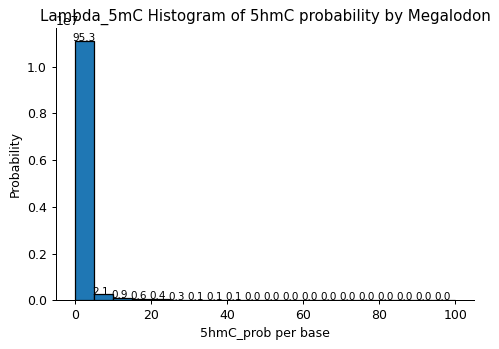

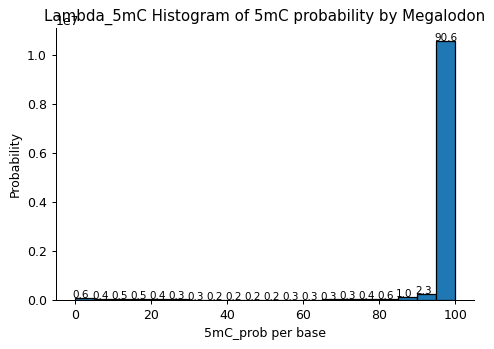

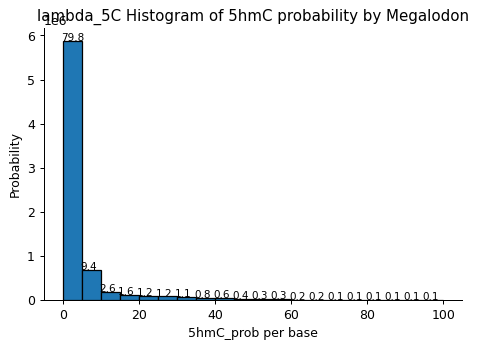

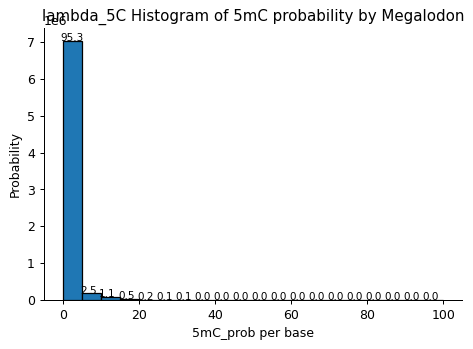

In [24]:
prefix='T4_5hmC'
hydroxymethyl_prob_histgram(input_path, input_file='T4.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)
methyl_prob_histgram(input_path, input_file='T4.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)

prefix='Lambda_5mC'
hydroxymethyl_prob_histgram(input_path, input_file='5mC_lambda.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)
methyl_prob_histgram(input_path, input_file='5mC_lambda.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)

prefix='lambda_5C'
hydroxymethyl_prob_histgram(input_path, input_file='lambda.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)
methyl_prob_histgram(input_path, input_file='lambda.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)

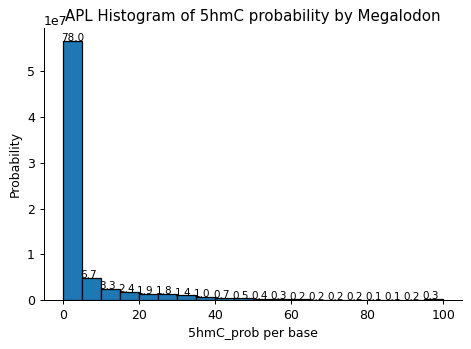

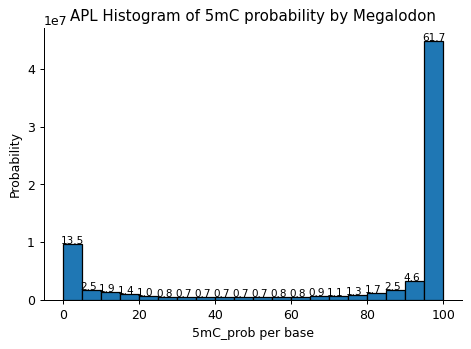

In [25]:
prefix='APL'
hydroxymethyl_prob_histgram(input_path, input_file='APL.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)
methyl_prob_histgram(input_path, input_file='APL.Megalodon.per_read.prob.bed', prefix=prefix, output_path=output_path)